<a href="https://colab.research.google.com/github/bskarthik05/Task_6/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [19]:
try:
    df = pd.read_csv("/content/sample_data/Iris.csv")
except FileNotFoundError:
    print("Error: Iris.csv not found. Please make sure the file is in the correct directory.")
    exit()

In [20]:
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

In [21]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset information:")
df.info()

First 5 rows of the dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
if 'Species' not in df.columns:
    print("\nError: 'Species' column not found in the dataset. Please ensure the target column is named 'Species'.")
    if len(df.columns) > 1:
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]
        print(f"\nWarning: 'Species' column not found. Assuming the last column ('{df.columns[-1]}') is the target and others are features.")
    else:
        print("\nError: Cannot infer features and target. Dataset has too few columns.")
        exit()
else:
    X = df.drop('Species', axis=1)
    y = df['Species']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [24]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (105, 4)
Shape of X_test: (45, 4)
Shape of y_train: (105,)
Shape of y_test: (45,)


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
print("First 5 rows of scaled training data:")
print(X_train_scaled[:5])

First 5 rows of scaled training data:
[[-0.90045861 -1.21813584 -0.44283471 -0.13515309]
 [ 0.38036614 -1.8819988   0.40257701  0.38088597]
 [-0.90045861  1.65860364 -1.28824644 -1.1672312 ]
 [ 1.07899781  0.33087773  1.19162795  1.41296408]
 [-0.20182693 -0.55427288  0.17713389  0.12286644]]


In [27]:
k_values = range(1, 26) # Trying K from 1 to 25
accuracy_scores = []

In [28]:
print("Experimenting with different values of K:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"K = {k}, Accuracy = {accuracy:.4f}")

Experimenting with different values of K:
K = 1, Accuracy = 0.9333
K = 2, Accuracy = 0.8889
K = 3, Accuracy = 0.9111
K = 4, Accuracy = 0.9111
K = 5, Accuracy = 0.9111
K = 6, Accuracy = 0.9111
K = 7, Accuracy = 0.9333
K = 8, Accuracy = 0.9111
K = 9, Accuracy = 0.9556
K = 10, Accuracy = 0.9333
K = 11, Accuracy = 0.9556
K = 12, Accuracy = 0.9333
K = 13, Accuracy = 0.9333
K = 14, Accuracy = 0.9556
K = 15, Accuracy = 0.9333
K = 16, Accuracy = 0.9111
K = 17, Accuracy = 0.9111
K = 18, Accuracy = 0.9111
K = 19, Accuracy = 0.9111
K = 20, Accuracy = 0.8889
K = 21, Accuracy = 0.8889
K = 22, Accuracy = 0.8667
K = 23, Accuracy = 0.8667
K = 24, Accuracy = 0.8667
K = 25, Accuracy = 0.8889


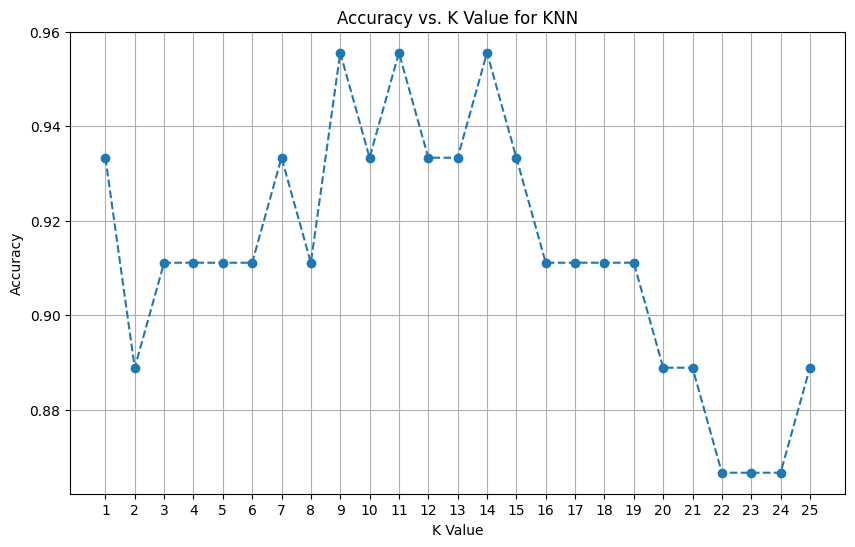

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed')
plt.title('Accuracy vs. K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.savefig("accuracy_vs_k.png")
plt.show()

In [30]:
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K based on accuracy: {best_k} with accuracy: {max(accuracy_scores):.4f}")

Best K based on accuracy: 9 with accuracy: 0.9556


In [31]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

In [32]:
final_accuracy = accuracy_score(y_test, y_pred_final)
conf_matrix = confusion_matrix(y_test, y_pred_final)

In [33]:
print(f"Final Model Evaluation (K={best_k}):")
print(f"Accuracy: {final_accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Final Model Evaluation (K=9):
Accuracy: 0.9556
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


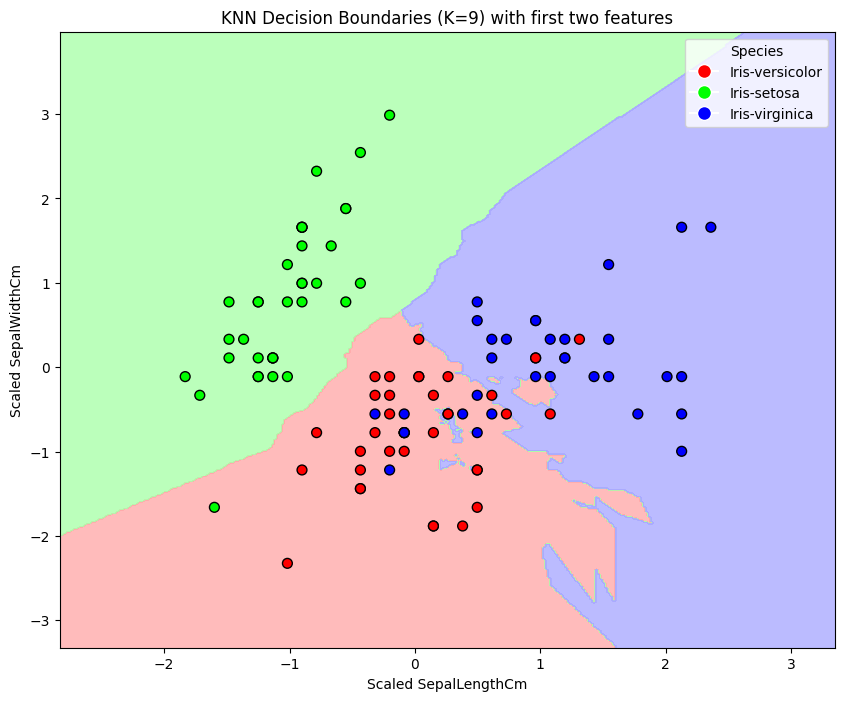

In [34]:
if X_train.shape[1] >= 2:
    X_train_2_features = X_train_scaled[:, :2]

    unique_species = y_train.unique()
    species_to_int = {species: i for i, species in enumerate(unique_species)}
    y_train_int = y_train.map(species_to_int)


    knn_for_plot = KNeighborsClassifier(n_neighbors=best_k)
    knn_for_plot.fit(X_train_2_features, y_train_int)

    x_min, x_max = X_train_2_features[:, 0].min() - 1, X_train_2_features[:, 0].max() + 1
    y_min, y_max = X_train_2_features[:, 1].min() - 1, X_train_2_features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = knn_for_plot.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    scatter = plt.scatter(X_train_2_features[:, 0], X_train_2_features[:, 1], c=y_train_int, cmap=cmap_bold, edgecolor='k', s=50)

    handles = [plt.Line2D([0], [0], marker='o', color='w', label=species,
                          markerfacecolor=cmap_bold.colors[i], markersize=10) for i, species in enumerate(unique_species)]
    plt.legend(handles=handles, title="Species")

    feature_names = X.columns
    if len(feature_names) >=2:
        plt.xlabel(f"Scaled {feature_names[0]}")
        plt.ylabel(f"Scaled {feature_names[1]}")
    else:
        plt.xlabel('Scaled Feature 1')
        plt.ylabel('Scaled Feature 2')

    plt.title(f'KNN Decision Boundaries (K={best_k}) with first two features')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.savefig("knn_decision_boundaries.png")
    plt.show()
else:
    print("\nSkipping decision boundary visualization as the dataset has less than 2 features.")
